In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import pickle

# Prepare election data

In [50]:
df = pd.read_csv('data/HFER_e_lat_lon.csv', encoding = "utf-8",index_col = 'Election Date')

/anaconda3/envs/GTAem/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
df = df[pd.to_datetime(df.index) > pd.to_datetime('1994-01-01')]
df= df[df['Province']=='Quebec']

In [52]:
df.head()

,Election Type,Parliament,Province,Riding,Last Name,First Name,Gender,Occupation,Party,Votes,Votes (%),Elected,City,lat,lon
Election Date,,,,,,,,,,,,,,,
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Paradis,Denis,NaN,lawyer,Liberal,19078,51.02,1,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Bertrand,Jean-François,NaN,communication consultant,Bloc Québécois,15764,42.16,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Lever,Guy,NaN,administrator,Progressive Conservative,1235,3.30,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Maheux,Line,NaN,marketing consultant,Reform Party of Canada,517,1.38,0,brome,45.189207,-72.562857
1995-02-13,B/P,35,Quebec,BROME--MISSISQUOI,Vachon,Paul,NaN,retired,New Democratic Party,371,0.99,0,brome,45.189207,-72.562857


In [53]:
# give number for each major party or other
def partyLabel (row):
    if row['Party']=='Liberal':
        return 0
    elif (row['Party']=='Conservative' or row['Party']=='Progressive Conservative'or
            row['Party']== 'Reform Party of Canada' or row['Party']== 'Reform'or
         row['Party']== 'Canadian Alliance'or row['Party']=='Conservative Party of Canada'):
        return 1
    elif row['Party']=='New Democratic Party' or row['Party']== 'Co-operative Commonwealth Federation':
        return 2
    elif row['Party']=='Green Party of Canada':
        return 3
    elif row['Party']=='Bloc Québécois':
        return 4
    else:
        return 5
df['partyLabel']= df.apply (lambda row: partyLabel(row), axis=1)

In [54]:
#dataframe with one row per riding per date
parties=['Liberal','Conservative','NDP','Green','Bloc','Other']
dfUnique=pd.DataFrame(columns=['Election Date', 'Province', 'Riding','lat','lon',
                                'Results','Liberal','Conservative','NDP','Green','Bloc','Other'])
prevRiding=''
i=0
for date, row in df.iterrows():
    print(date)
    percentVotes=row['Votes (%)']/100
    if prevRiding != row['Riding']:
        if i>2 and 0.98> sum(dfUnique['Results'][i]) >1.02:
            print("!!! Sum of results is not 1!!!", sum(dfUnique['Results'][i]),dfUnique['Election Date'][i],dfUnique['Riding'][i] )    
        i+=1
        Results=np.zeros(6)
        Results[row['partyLabel']]+= percentVotes
        dfUnique.loc[i]=[date,row['Province'],row['Riding'],row['lat'],row['lon'],Results,0,0,0,0,0,0]
        dfUnique[parties[row['partyLabel']]][i]+=percentVotes
    elif prevRiding == row['Riding']:
        dfUnique[parties[row['partyLabel']]][i]+=percentVotes
        dfUnique['Results'][i][row['partyLabel']]+=percentVotes
    prevRiding=row['Riding']

1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13


/anaconda3/envs/GTAem/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/GTAem/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1995-02-13
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1996-03-25
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02
1997-06-02

2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27
2000-11-27

2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23
2006-01-23

2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2008-10-14
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09
2009-11-09


In [55]:
dfUnique

,Election Date,Province,Riding,lat,lon,Results,Liberal,Conservative,NDP,Green,Bloc,Other
1,1995-02-13,Quebec,BROME--MISSISQUOI,45.189207,-72.562857,"[0.5102, 0.0468, 0.009899999999999999, 0.0027,...",0.5102,0.0468,0.0099,0.0027,0.4216,0.0088
2,1995-02-13,Quebec,SAINT-HENRI--WESTMOUNT,45.478460,-73.584618,"[0.7591, 0.060599999999999994, 0.0177, 0.0128,...",0.7591,0.0606,0.0177,0.0128,0.1412,0.0085
3,1996-03-25,Quebec,LAC-SAINT-JEAN,48.583336,-72.004880,"[0.21539999999999998, 0.014, 0.005, 0.0, 0.765...",0.2154,0.014,0.005,0,0.7656,0
4,1996-03-25,Quebec,PAPINEAU--SAINT-MICHEL,45.852553,-75.141481,"[0.5920000000000001, 0.034, 0.0347, 0.0, 0.339...",0.592,0.034,0.0347,0,0.3393,0
5,1996-03-25,Quebec,SAINT-LAURENT--CARTIERVILLE,45.503270,-73.725448,"[0.7927, 0.0424, 0.0079, 0.0, 0.14859999999999...",0.7927,0.0424,0.0079,0,0.1486,0.0085
6,1997-06-02,Quebec,ABITIBI,48.717724,-77.914273,"[0.4375, 0.17, 0.023700000000000002, 0.0, 0.36...",0.4375,0.17,0.0237,0,0.3689,0
7,1997-06-02,Quebec,AHUNTSIC,45.559308,-73.652702,"[0.4925, 0.1618, 0.0179, 0.0, 0.3177, 0.01]",0.4925,0.1618,0.0179,0,0.3177,0.01
8,1997-06-02,Quebec,ANJOU--RIVIÈRE-DES-PRAIRIES,45.618279,-73.596173,"[0.4731, 0.1839, 0.0147, 0.0, 0.32380000000000...",0.4731,0.1839,0.0147,0,0.3238,0.0044
9,1997-06-02,Quebec,ARGENTEUIL--PAPINEAU,45.694524,-74.470787,"[0.34020000000000006, 0.21539999999999998, 0.0...",0.3402,0.2154,0.0161,0,0.4087,0.0195
10,1997-06-02,Quebec,BEAUCE,46.480187,-70.988292,"[0.491, 0.20800000000000002, 0.0163, 0.0, 0.26...",0.491,0.208,0.0163,0,0.266,0.0187


In [56]:
len(dfUnique)

395

In [57]:
#dfUnique.to_csv("data/VoteResultQc.csv")

# Machine learning!
#  build net

In [99]:
# create input and output vectors
import generate_vectors as gv

x,y=gv.get_input_output()


[ 4229  4255  4264  4377  5217  5230  5248  5252  5274  5275  5313  5322
  5325  5327  5339  5345  5348  5358  5361  5368  5389  5415  5429  5448
  5484  5650  5669  5672  5686  5738  5779  8456  8536  8675  9029 10204
 10761 10762 10791 10815 10843 10849 10872 10873 10898 10937 10966 10977
 10982 26778 26798 26889 27194 27195 27294 27326 30172 42004 42013 42683
 48374 48970 48971 49491 49648 51297 52080 52179 54599]
[568154 579142 604005 617246 664222 297478 683488 712190 732368 750476
 765876 313609 332694 381397 403950 429363 446070 484387 517472 536585
 560172 777776 803833 824468 845740  48878  68327  79900  89535 244176
 259940 105633 114591 123455 131468 140360 628055 636597 145283 275274
 284521 153977 163030 645912 172285      0 181574   8686 655071 188954
 197480  17813 206285 214602 222913  26344 230904 566992 293643  34316
 294130  40486  43436  46366 234701 237133 239490 241507 243524]

Nearest weather station is 0.01 degrees away..

[-29.3        -22.8        -24.72857143

[ 6.8        10.3         5.22857143  4.83608882  0.          6.48142857
  7.27857143  2.66666667  3.70570131  1.          8.69833333  8.22166667
 -1.67534247 12.17596758  2.         19.15534247 29.38465753  9.8
 10.5         8.47142857  2.12583717  6.          2.01657143  4.02142857
  3.99666667  3.21076142  4.          6.44533333  4.99666667 -1.20547945
 11.97192939  0.         18.57747945 27.01452055 12.         10.
 10.92857143  1.54523626  7.          1.57142857  2.80857143  4.58333333
  4.3533193   0.          7.91666667  8.71333333 -1.45068493 12.29880408
  0.         18.45068493 25.90931507  0.          0.          0.8
  1.95959179  0.          4.464       0.8         1.06        1.81118746
  2.          5.818       1.06        3.01369863  6.11745571  9.
 26.86630137  3.01369863]
[0.3402 0.2154 0.0161 0.     0.4087 0.0195]

Nearest weather station is 0.96 degrees away..

[ 3.66666667e+00  6.66666667e+00  3.30952381e+00  4.69585140e+00
  0.00000000e+00  4.82714286e+00  9.2228571

[ 5.8        10.3         7.51428571  4.38224619  1.          5.69571429
  7.82428571  3.92        3.85066228  2.          8.945       6.62
 -0.74630137 11.98316485  1.         18.22630137 31.13369863  8.4
  9.6         9.12857143  2.47138728  6.          2.75342857  4.95857143
  4.09666667  3.69129456  2.          7.71633333  7.68166667 -0.75890411
 11.57291164  0.         17.96690411 27.19309589 10.3         8.3
 10.08571429  1.62254524  7.          2.62428571  2.25571429  3.61666667
  4.39219636  0.          8.74833333  9.51166667 -1.39041096 11.62997031
  0.         18.37041096 26.66958904  0.          0.          1.57142857
  3.84919817  0.          8.76857143  1.57142857  2.25        4.2789991
  1.         14.288       2.25        3.27917808  6.67753579 15.
 28.76082192  3.27917808]
[0.2747 0.2719 0.0134 0.     0.44   0.    ]

Nearest weather station is 1.18 degrees away..

[ 3.66666667e+00  6.66666667e+00  3.30952381e+00  4.69585140e+00
  0.00000000e+00  4.82714286e+00  9.222857

[ 8.         11.          6.85714286  4.28214137  0.          4.61285714
  7.20714286  3.73333333  3.72320053  1.          7.62166667  7.50833333
 -1.30410959 11.69547903  0.         17.98410959 29.05589041  9.5
 10.          8.84285714  2.0282696   6.          1.64514286  4.17485714
  4.20333333  3.41803875  2.          6.23866667  6.18133333 -1.40520548
 11.69709484  0.         18.27720548 24.45479452 11.3         9.3
 11.08571429  1.62254524  7.          2.65428571  1.78571429  4.91666667
  4.21046975  2.          8.59333333  8.03666667 -1.22356164 12.08041065
  0.         19.02356164 25.47643836  0.          0.          0.64285714
  1.57467198  0.          3.58714286  0.64285714  0.64333333  1.60907496
  1.          5.20566667  0.64333333  3.03150685  7.49278515  8.
 23.58449315  3.03150685]
[0.1534 0.3586 0.0103 0.     0.4654 0.0122]

Nearest weather station is 0.48 degrees away..

[10.          4.          6.14285714  4.15515416  0.          3.85714286
  6.96285714  2.1         3

[ 7.9        10.6         6.72857143  3.85253693  0.          3.85942857
  7.15257143  3.12333333  3.67638258  0.          7.41866667  7.33033333
 -1.23506849 11.41198494  0.         16.97106849 27.84093151  9.6
 10.          8.42857143  2.14989321  6.          1.85342857  4.65257143
  3.78        3.37119168  1.          6.433       5.722      -1.21671233
 11.51608619  0.         17.62471233 25.25528767 11.2         9.3
 10.07142857  2.28517851  6.          2.88657143  3.78142857  4.37666667
  4.02265943  2.          8.42033333  7.88666667 -1.21616438 11.9189816
  0.         18.56016438 25.55583562  0.          0.          2.21428571
  5.42387014  0.         12.35571429  2.21428571  1.25        3.16425347
  1.         11.93        1.25        3.07890411  7.73834919 11.
 29.18109589  3.07890411]
[0.489  0.1916 0.0166 0.     0.3028 0.    ]

Nearest weather station is 1.12 degrees away..

[ 3.66666667e+00  6.66666667e+00  3.30952381e+00  4.69585140e+00
  0.00000000e+00  4.82714286e+00  9.

[ 8.         11.5         6.85714286  4.51753951  0.          5.58285714
  8.02714286  3.31666667  3.83510828  1.          8.89333333  6.31666667
 -1.29315068 11.64428637  0.         17.47315068 30.38684932  9.7
 11.2         8.15714286  2.384388    5.          2.97085714  4.47714286
  3.29666667  3.50851187  1.          7.55533333  5.50966667 -1.6860274
 11.53366944  0.         17.7580274  26.5819726  11.5        11.
  9.5         2.37546988  6.          2.          4.76        3.31666667
  4.38460058  0.          8.18333333  8.30166667 -1.99178082 11.93934159
  0.         18.49178082 25.58821918  0.          0.          0.31428571
  0.69164105  0.          1.57771429  0.31428571  1.52666667  2.32865245
  1.          5.41533333  1.52666667  3.31232877  6.67647568 11.
 24.76767123  3.31232877]
[0.539  0.1278 0.0245 0.     0.2891 0.0196]

Nearest weather station is 0.00 degrees away..

[ 3.35299073e-02  2.74220725e-02  1.52064027e-02  1.22156698e-02
  0.00000000e+00  1.79570345e-02  1.7

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-0.2         1.8         2.44285714  2.28339168  0.          3.45114286
  2.61885714  1.73        1.86693153  2.          4.141       2.63
 -7.59008621  7.85088596  8.         13.45908621 18.35491379  3.8
  4.4         4.7         1.45110795  3.          2.804       1.652
  2.25        2.31124065  1.          4.886       3.321      -7.43103448
  7.45848179  7.         14.53503448 17.12096552  8.1         7.4
  7.31428571  1.55969646  6.          2.30771429  2.78828571  3.10666667
  3.39233777  0.          6.21633333  5.29066667 -6.87284483  7.42058499
  6.         16.16984483 17.60015517  0.          0.          0.31428571
  0.49979588  0.          0.87371429  0.31428571  3.32        6.16021645
  1.         20.658       3.32        2.07413793  4.13639483 10.
 13.66386207  2.07413793]
[0.2628 0.2029 0.0132 0.     0.521  0.    ]

Nearest weather station is 0.03 degrees away..

[ 6.6      

[ 5.8        10.3         7.51428571  4.38224619  1.          5.69571429
  7.82428571  3.92        3.85066228  2.          8.945       6.62
 -0.74630137 11.98316485  1.         18.22630137 31.13369863  8.4
  9.6         9.12857143  2.47138728  6.          2.75342857  4.95857143
  4.09666667  3.69129456  2.          7.71633333  7.68166667 -0.75890411
 11.57291164  0.         17.96690411 27.19309589 10.3         8.3
 10.08571429  1.62254524  7.          2.62428571  2.25571429  3.61666667
  4.39219636  0.          8.74833333  9.51166667 -1.39041096 11.62997031
  0.         18.37041096 26.66958904  0.          0.          1.57142857
  3.84919817  0.          8.76857143  1.57142857  2.25        4.2789991
  1.         14.288       2.25        3.27917808  6.67753579 15.
 28.76082192  3.27917808]
[0.473  0.0777 0.0104 0.     0.4389 0.    ]

Nearest weather station is 0.15 degrees away..

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give 

[ 6.6         8.8         6.78        3.32409386  0.          2.5
  6.132       2.74642857  3.2405337   0.          6.41857143  5.45742857
 -5.81189591  9.24325172  2.         18.21189591 21.58810409  8.7
  8.7         7.82        1.98635344  4.          2.032       3.576
  2.92857143  3.17499799  1.          6.64742857  6.01257143 -5.9401487
  9.13985642  3.         17.5841487  20.3838513  10.8         8.6
  8.9         1.84607692  5.          2.188       2.636       3.16071429
  3.6995501   1.          7.85828571  7.34471429 -5.97732342  9.35199553
  3.         18.53332342 21.75467658  0.          0.          2.16
  3.79399526  0.          7.196       2.16        1.31071429  2.34875944
  2.          7.93028571  1.31071429  3.90260223  9.6302822   8.
 37.05739777  3.90260223]
[0.601  0.1739 0.0572 0.0167 0.1132 0.038 ]

Nearest weather station is 0.09 degrees away..

[ 4.90000000e+00  5.90000000e+00  7.32857143e+00  2.44114393e+00
  3.00000000e+00  3.51142857e+00  3.36857143e+00  9.95

[ -4.83333333  -7.83333333 -13.69047619   6.9112449    2.
   8.67714286  10.49285714  -7.01666667   5.76986905   2.
   8.10333333  16.59166667  -4.45182648  11.20713975   1.
  17.11849315  28.88150685  -8.2        -10.8        -15.65714286
   5.2158706    3.           7.30114286   7.19285714  -8.91333333
   5.18804609   3.           6.21033333  13.36166667  -4.82013699
  11.1730592    1.          16.92813699  26.50786301 -12.7
 -14.7        -18.62857143   4.59369577   6.           5.80857143
   6.57142857 -11.88333333   5.45509446   5.           9.95833333
  13.31666667  -6.04315068  11.44484485   5.          17.84315068
  28.65684932   1.6         14.8          3.48571429   5.03003226
   0.          10.79828571   3.48571429   2.35333333   3.55140661
   2.          11.34466667   2.35333333   2.66684932   5.06300516
  14.          20.13315068   2.66684932]
[0.3643 0.1712 0.0169 0.     0.4155 0.0321]

Nearest weather station is 1.22 degrees away..

[ -4.83333333  -7.83333333 -13.69047619

[ -1.5         -4.8         -8.88571429   5.05524581   1.
   7.18771429   7.57028571  -4.03333333   4.41379152   2.
   8.08533333  11.87066667  -0.42945205  10.94731979   0.
  16.60145205  26.17854795  -5.6         -7.1        -10.92857143
   4.28075904   2.           5.23857143   6.77542857  -5.05666667
   4.412685     2.           6.68266667  12.27933333  -0.5909589
  11.03752692   0.          16.5909589   25.4450411   -9.7
  -9.5        -12.94285714   3.82094122   3.           3.63085714
   6.00314286  -6.09666667   5.02795408   2.           8.24866667
  12.64233333  -0.74356164  11.40778842   0.          17.35956164
  26.30443836   5.4         17.           3.84285714   5.72110308
   0.          12.46114286   3.84285714   2.05         4.55051279
   2.          15.305        2.05         2.56767123   5.73008368
  13.          29.74032877   2.56767123]
[0.4118 0.0925 0.0112 0.     0.4712 0.0133]

Nearest weather station is 0.40 degrees away..

[-2.00000000e+00 -9.00000000e+00 -8.8571

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-2.00000000e+00 -9.00000000e+00 -8.85714286e+00  5.64240505e+00
  2.00000000e+00  6.79714286e+00  8.14285714e+00 -2.50000000e+00
  5.17526167e+00  2.00000000e+00  6.92000000e+00  1.45000000e+01
 -2.30000000e+00  1.22472666e+01  0.00000000e+00  1.83000000e+01
  2.97000000e+01 -5.00000000e+00 -9.00000000e+00 -1.03571429e+01
  4.37292225e+00  2.00000000e+00  5.29714286e+00  7.02285714e+00
 -4.03333333e+00  4.63129452e+00  2.00000000e+00  5.38833333e+00
  1.28866667e+01 -9.85205479e-01  1.18674584e+01  0.00000000e+00
  1.79852055e+01  2.80147945e+01 -8.40000000e+00 -9.40000000e+00
 -1.22571429e+01  3.52252229e+00  3.00000000e+00  3.79714286e+00
  5.96285714e+00 -5.96666667e+00  4.49209182e+00  3.00000000e+00
  7.40666667e+00  1.15633333e+01  5.47945205e-03  1.19815285e+01
  0.00000000e+00  1.

[ -1.6         -6.5        -10.9          5.95794787   1.
   9.006        7.51        -3.64666667   6.04299778   1.
   7.08866667  14.41833333  -4.80315068  14.38934574   0.
  21.97515068  32.65684932  -3.9         -7.5        -10.8
   4.80297527   3.           6.714        6.838       -3.965
   5.2031585    1.           5.778       13.052       -2.65328767
  13.15059547   0.          21.43328767  28.60671233  -6.3
  -8.7        -10.84285714   3.74618173   3.           4.48285714
   6.17114286  -4.46166667   5.0867423    1.           8.01366667
  11.83933333  -0.64054795  12.51435601   0.          21.58454795
  28.03145205  -0.14513619  -0.14513619   0.42629238   0.74990551
   0.           1.38857143   0.57142857   1.77153048   3.22626662
   1.          12.60333333   1.91666667   2.23392143   5.71149527
   9.          25.78094238   2.37905762]
[0.3568 0.0931 0.0177 0.     0.5324 0.    ]

Nearest weather station is 0.76 degrees away..

[-2.8        -7.2        -6.18571429  2.27811236  3

[ -0.7         -5.7         -8.05714286   4.9476855    0.
   7.17714286   6.58285714  -1.85         5.06811931   0.
   8.57        12.56         0.55616438  11.13968577   0.
  16.74383562  29.79616438  -4.1         -7.2         -9.91428571
   3.81367036   2.           5.62828571   5.69571429  -3.73
   4.62422246   2.           6.185       11.535        0.22
  11.09194445   0.          16.988       26.92        -8.2
  -9.2        -12.34285714   3.4300592    4.           4.08285714
   4.85714286  -6.23333333   4.82516551   2.           9.30833333
  10.96666667  -0.76643836  11.46429255   0.          17.74643836
  26.93356164   5.8         17.9          5.           6.07124369
   0.          12.33         5.           2.20333333   4.00853118
   1.          13.14466667   2.20333333   3.05328767   5.63398106
  16.          21.51871233   3.05328767]
[0.4078 0.2399 0.     0.     0.3523 0.    ]

Nearest weather station is 1.13 degrees away..

[ -4.83333333  -7.83333333 -13.69047619   6.9112449

[ -1.2         -7.7         -9.27142857   5.34808758   1.
   7.86142857   7.36857143  -3.13333333   5.2213238    2.
   9.14333333  13.27666667  -0.3369863   11.05201286   0.
  17.3169863   28.5430137   -5.1         -8.7        -10.67142857
   3.63188825   3.           5.41542857   5.40857143  -4.36333333
   4.49847999   2.           6.82833333  11.25666667  -0.30794521
  11.00802783   0.          17.20794521  26.56005479  -9.7
 -10.2        -12.62857143   2.69163481   7.           2.89857143
   4.04142857  -6.21666667   4.59797661   2.           7.58166667
  10.33833333  -0.89726027  11.45106291   0.          17.69726027
  26.80273973   2.8         23.6          5.           7.87400787
   0.          17.556        5.           2.19333333   4.70361091
   1.          17.23066667   2.19333333   3.26684932   6.58635969
  16.          23.34915068   3.26684932]
[0.3477 0.0875 0.0107 0.     0.5541 0.    ]

Nearest weather station is 1.34 degrees away..

[ -4.83333333  -7.83333333 -13.69047619

[ -2.5         -9.         -10.           4.72833405   1.
   7.35         6.82        -4.11666667   4.81608993   1.
   7.82666667  12.01333333  -0.8         11.05106591   0.
  16.98        28.38        -6.40335196 -10.20335196 -11.67478053
   3.54993533   4.           5.17542857   5.40857143  -5.29001862
   4.557904     2.           6.08666667  11.33333333  -0.9659547
  11.18276143   0.          16.94260274  26.89739726 -10.5
 -11.5        -13.42857143   3.29965985   6.           3.86857143
   4.07142857  -6.58333333   5.01677741   3.           8.50333333
  10.91666667  -1.29246575  11.64850855   0.          17.97246575
  26.20753425   2.           1.           1.28571429   2.05038573
   0.           4.47428571   1.28571429   2.07333333   4.57572824
   1.          16.58866667   2.07333333   2.85506849   5.73694954
  16.          23.12093151   2.85506849]
[0.317  0.1225 0.0199 0.     0.5191 0.0214]

Nearest weather station is 0.47 degrees away..

[ -0.7         -5.7         -8.05714286 

I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-1.33333333  6.16666667  4.30952381  2.4159335   0.          1.85714286
  5.31285714  2.76        3.65676846  0.          6.32666667  8.51333333
 -5.63292237 12.88705699  2.         22.29958904 29.06041096  2.8
  3.5         3.97142857  1.24981631  4.          1.96857143  1.92342857
  3.47666667  2.68932251  2.          5.46533333  4.89666667 -5.69164384
 13.04238517  0.         21.49164384 28.16835616  5.8        -0.3
  2.57142857  2.53530178  0.          3.19857143  4.18742857  3.13
  3.82249046  1.          8.88        6.96       -6.8        13.51507248
  0.         21.96       29.9         0.          0.4         7.17142857
  9.32120689  0.         17.22057143  7.17142857  4.03333333  5.85214111
  2.         18.79466667  4.03333333  2.5260274   4.93545071 14.
 22.4179726   2.5260274 ]
[0.3098 0.0558 0.0339 0.0239 0.5766 0.    ]

Nearest weather station is 0.08 degrees away..

[ 8.1         7.6         7.87142857

[ 4.          5.66666667  7.85714286  2.14629354  5.          2.58285714
  3.75714286  6.78666667  3.89802989  2.          7.56833333  6.78666667
 -2.92863014 12.70873443  0.         20.10863014 31.93136986  6.3
  7.05        8.4         1.56044865  7.          2.968       2.055
  7.95        3.15193063 12.          5.615       5.292      -2.3290411
 12.42950174  0.         19.1290411  30.4589589   8.1         8.9
  9.39285714  1.61475973  7.          2.64714286  2.23285714  8.79333333
  3.9065913   7.          6.80666667  8.96833333 -1.92534247 12.485939
  0.         20.52534247 31.21465753  0.          4.4         4.94285714
  6.72794962  0.         12.35714286  4.94285714  4.2         6.37766938
  1.         19.79        4.2         3.06849315  6.13493859 11.
 24.32350685  3.06849315]
[0.2058 0.1259 0.0252 0.034  0.6091 0.    ]

Nearest weather station is 0.10 degrees away..

[ 6.7         9.6         9.25714286  1.98556012  7.          3.26485714
  2.53914286  8.58666667  3.6978131

[ 5.5         7.5         8.42857143  2.5833059   4.          4.42142857
  3.39857143  8.1         4.45982062  3.         10.24        7.455
 -1.18684932 12.03010016  0.         19.18684932 29.81315068  8.3
  8.8         9.61428571  1.8916573   7.          2.87371429  2.25428571
  9.70666667  3.76244011 11.          7.51033333  6.77166667 -1.15835616
 12.26992413  0.         18.45835616 30.02164384 11.3        10.3
 11.01428571  3.06893587  5.          5.16571429  4.12428571 11.56666667
  4.17678771 13.          6.94333333 10.67166667 -0.78260274 12.85431136
  0.         19.61860274 30.09739726  0.          1.          2.05714286
  2.96785499  0.          5.08285714  2.05714286  2.01333333  4.85192287
  1.         18.10866667  2.01333333  3.14328767  6.77478727 14.
 31.08871233  3.14328767]
[0.227  0.0643 0.0363 0.0237 0.6342 0.0145]

Nearest weather station is 0.48 degrees away..

[ 4.          5.66666667  7.85714286  2.14629354  5.          2.58285714
  3.75714286  6.78666667  3.8980

[ 2.16666667  4.16666667  4.95238095  2.81395937  1.          4.62428571
  3.72571429  3.84166667  4.61571139  1.         10.455       8.74
 -4.95114155 12.67750736  4.         19.11780822 33.10219178  4.3
  4.8         5.54285714  1.95948765  2.          3.20914286  2.21285714
  5.02333333  3.89227297  1.          7.90666667  6.52033333 -4.9969863
 12.45443131  3.         17.6769863  31.6830137   5.3         4.3
  5.01428571  2.67070273  1.          5.07571429  3.18428571  5.06666667
  4.36221147  0.          6.94333333 10.25166667 -6.21630137 12.64842492
  6.         18.51630137 32.48369863  0.          1.4         4.82857143
  8.54863636  0.         18.93942857  4.82857143  2.85666667  6.33433413
  1.         20.26133333  2.85666667  3.41109589  7.37184128 14.
 28.82490411  3.41109589]
[0.2145 0.2414 0.0475 0.0367 0.4599 0.    ]

Nearest weather station is 0.04 degrees away..

[ 8.1         7.6         7.87142857  1.79818503  7.          2.69857143
  2.26542857  7.69333333  3.101282

[ 9.9        10.9        11.61428571  1.84888273  7.          2.72571429
  2.65428571 11.51666667  3.58860078 16.          8.01333333  5.47166667
  1.61136986 12.44396265  0.         19.28863014 29.71136986 11.3
 11.         11.98571429  2.08287478  7.          3.89428571  2.17371429
 12.42        3.33610551 21.          6.358       6.185       1.76273973
 12.46227988  0.         18.23726027 29.94273973 12.6        11.1
 12.31428571  3.30429529  5.          6.51571429  3.21428571 13.26666667
  3.83478233 19.          5.68833333  8.94166667  1.88520548 12.78459262
  0.         19.89479452 30.96520548  0.          1.2         2.91428571
  4.2733154   0.          8.58571429  2.91428571  2.22        4.89716925
  1.         18.526       2.22        3.12191781  6.85136616 11.
 27.91008219  3.12191781]
[0.6357 0.1076 0.0547 0.0301 0.1595 0.0125]

Nearest weather station is 1.51 degrees away..

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up


I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[ 7.26981134  7.89481134 10.30552563  2.93281487  4.          4.90428571
  2.99821429 10.58647801  4.38244869  8.          8.95833333  8.81666667
  0.82611271 12.43303956  0.         19.12369863 29.27630137 10.31716748
 11.25716748 12.57431034  1.50357397  7.          2.38645714  2.20074286
 12.48550082  3.55583962 21.          7.01966667  6.38133333  1.12114009
 12.66252798  0.         18.8960274  29.2639726  13.         12.8
 13.17857143  2.1110436   7.          2.28092857  4.42057143 13.58833333
  3.90735489 22.          6.76666667  9.78333333  1.62273973 13.01398854
  0.         19.55726027 29.30273973  1.3         0.6         1.55714286
  3.07239188  0.          6.98085714  1.55714286  1.90333333  4.46060409
  1.         16.53966667  1.90333333  2.7069863   5.99979653 15.
 27.2210137 

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[ 7.8         9.3        10.58571429  2.60298102  5.          4.12428571
  3.25571429  9.61        4.27553895  7.          8.678       7.665
  0.05410959 12.62138771  1.         19.24589041 31.75410959  9.6
  9.9        10.94285714  2.13799448  7.          3.40914286  2.32485714
 10.61        3.92499257 11.          7.407       6.92       -0.13123288
 12.69154334  0.         18.80323288 31.12876712 10.8         9.8
 10.65714286  3.00849138  5.          5.46285714  3.79714286 10.95
  4.37635693 10.          7.915      10.28       -0.73438356 12.94671203
  0.         19.03438356 32.00561644  0.          2.2         4.32857143
  6.57847448  0.         13.37342857  4.32857143  2.81        5.46548869
  2.         17.804       2.81        3.0860274   6.71490057 14.
 29.1459726   3.0860274 ]
[0.3972 0.0792 0.0243 0.0333 0.466  0.    ]

Nearest w

[-14.33333333 -21.83333333 -13.76190476   5.33471496   2.
   5.89857143   8.04142857 -15.23166667   6.61655101   8.
  10.96333333  13.65166667  -4.01305936  12.04915187   0.
  20.35972603  27.32027397 -15.         -19.8        -13.
   3.99070348   3.           4.252        6.632      -14.87666667
   5.25434952  16.           9.58666667  10.33633333  -3.54219178
  11.91356405   0.          18.91419178  25.56580822 -16.7
 -18.7        -13.27142857   3.69776546   4.           4.57142857
   5.30857143 -16.35         5.81915579  12.          11.07
  13.125       -4.11054795  12.43316981   0.          18.91054795
  25.44945205   1.6          0.           7.31428571   9.47589854
   1.          20.25371429   7.31428571   4.195        7.11840748
   2.          23.535        4.195        3.7309589    9.12410253
  11.          40.7890411    3.7309589 ]
[0.2759 0.1892 0.0711 0.0341 0.4297 0.    ]

Nearest weather station is 0.21 degrees away..

[-14.7        -20.7        -13.45714286   5.67295769 

[-11.8        -16.4        -10.07142857   5.69604231   1.
   6.45942857   8.11457143 -11.20666667   5.56326842   6.
   7.89066667  10.01933333   0.29616438  11.7208063    0.
  19.61183562  25.02016438 -13.6        -16.7        -10.57142857
   4.34699051   3.           5.82342857   6.02057143 -12.42
   4.8623314   12.           8.288        9.232        0.2769863
  11.93632268   0.          19.4590137   23.8569863  -15.3
 -17.         -11.02857143   3.78671146   4.           5.14457143
   5.86942857 -13.59         4.76335666  12.           8.997
   8.852        0.23534247  12.39220856   0.          20.10065753
  23.70334247   0.           0.           9.48571429  16.01208727
   0.          35.49828571   9.48571429   4.53666667   9.42862603
   1.          35.90933333   4.53666667   3.53780822   9.41537627
  12.          42.56619178   3.53780822]
[0.1871 0.2039 0.0521 0.0432 0.5138 0.    ]

Nearest weather station is 0.40 degrees away..

[-22.         -25.         -16.28571429   5.3375833

[-13.         -18.         -11.14285714   6.18011954   1.
   7.11285714  10.14714286 -11.75         6.24866652   5.
  10.105       13.09        -0.43835616  12.06158433   0.
  20.43835616  26.56164384 -13.8        -17.8        -11.24285714
   4.38271186   3.           5.80485714   6.45514286 -13.14666667
   5.39263283   9.           7.84666667  11.57333333  -0.30739726
  12.13136205   0.          19.37939726  24.67260274 -14.5
 -17.5        -11.21428571   3.53409054   3.           4.65428571
   6.10571429 -14.41666667   5.24576549  10.          10.75666667
  10.08333333  -0.09315068  12.67224698   0.          20.27315068
  24.40684932   0.           0.           8.74285714   9.15187056
   0.          16.51714286   8.74285714   4.02666667   5.7379981
   1.          19.16333333   4.02666667   3.26767123   7.10107816
  13.          30.21232877   3.26767123]
[0.3267 0.1726 0.1549 0.0499 0.2935 0.0023]

Nearest weather station is 1.05 degrees away..

[-14.33333333 -21.83333333 -13.76190476 

[-14.33333333 -21.83333333 -13.76190476   5.33471496   2.
   5.89857143   8.04142857 -15.23166667   6.61655101   8.
  10.96333333  13.65166667  -4.01305936  12.04915187   0.
  20.35972603  27.32027397 -15.         -19.8        -13.
   3.99070348   3.           4.252        6.632      -14.87666667
   5.25434952  16.           9.58666667  10.33633333  -3.54219178
  11.91356405   0.          18.91419178  25.56580822 -16.7
 -18.7        -13.27142857   3.69776546   4.           4.57142857
   5.30857143 -16.35         5.81915579  12.          11.07
  13.125       -4.11054795  12.43316981   0.          18.91054795
  25.44945205   1.6          0.           7.31428571   9.47589854
   1.          20.25371429   7.31428571   4.195        7.11840748
   2.          23.535        4.195        3.7309589    9.12410253
  11.          40.7890411    3.7309589 ]
[0.0819 0.464  0.0463 0.041  0.2902 0.0765]

Nearest weather station is 0.02 degrees away..

I give up
I give up
I give up
I give up
I give up
I g

[-15.5        -21.5        -13.07142857   7.36511357   1.
   8.51142857  10.30857143 -13.25         6.59892668   5.
   9.75        12.38        -0.26013699  12.22963081   0.
  19.94013699  26.95986301 -15.3        -19.8        -12.51428571
   4.57366017   3.           5.18428571   7.10571429 -13.49333333
   4.925778    14.           7.99033333   9.72666667   0.32726027
  12.2700971    0.          19.87273973  25.36126027 -15.7
 -18.7        -12.55714286   3.13635691   7.           2.85714286
   5.96285714 -14.33333333   4.04337593  18.           6.34333333
   8.07666667   0.21452055  12.73114103   0.          20.08547945
  23.91452055   0.           0.           9.71428571  12.72471482
   0.          26.90571429   9.71428571   4.06666667   7.50525742
   1.          27.26333333   4.06666667   3.23424658   8.37023787
  13.          34.76575342   3.23424658]
[0.0827 0.1926 0.0671 0.0348 0.6228 0.    ]

Nearest weather station is 1.28 degrees away..


Nearest weather station is 1.42 degree

[-12.7        -17.7         -9.91428571   5.45669407   2.
   6.18428571   7.72571429 -11.05         6.5931151    2.
  10.705       12.49         1.01561644  12.21256943   0.
  19.64438356  27.07561644 -11.9        -16.9         -9.72857143
   3.86586316   3.           4.06257143   6.91942857 -11.83
   5.86305665   5.          10.915       11.2          0.94534247
  12.15453826   0.          19.26265753  25.02534247 -11.7
 -16.7        -10.12857143   3.58995196   3.           5.30857143
   6.27142857 -13.18333333   5.88144446   6.          11.96833333
  11.22666667   0.25863014  12.48736186   0.          20.04136986
  24.95863014   0.           0.           8.15714286  11.76117792
   0.          24.10685714   8.15714286   5.50333333   8.05607362
   2.          25.37666667   5.50333333   3.67109589   8.60591825
  10.          29.96090411   3.67109589]
[0.0492 0.2267 0.0387 0.0283 0.2588 0.3984]

Nearest weather station is 1.13 degrees away..

[-14.33333333 -21.83333333 -13.76190476   5.3

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-11.8        -17.5        -11.2          5.3591044    2.
   6.634        7.24       -12.27         5.76536498   8.
   9.68        10.653       -0.23150685  11.2665425    0.
  18.90350685  23.14049315 -12.7        -17.3        -11.02857143
   4.14994468   3.           5.83857143   6.15742857 -12.97333333
   5.06990686  11.           9.15133333   9.28166667  -0.24657534
  11.63323395   0.          19.11857534  22.86142466 -13.5
 -17.         -10.74285714   3.63194444   4.           5.02885714
   6.04714286 -13.55666667   4.92163139  10.           8.96666667
   9.19233333  -0.18356164  12.16341712   0.          19.85556164
  23.29643836   0.           0.          17.27142857  24.71302226
   0.          51.01657143  17.27142857   6.43        14.17493445
   1.          53.762        6.43      

[-1.50000000e+01 -1.70000000e+01 -1.23571429e+01  5.96246764e+00
  1.00000000e+00  7.32714286e+00  7.49285714e+00 -1.17283333e+01
  5.52979330e+00  6.00000000e+00  9.79333333e+00  1.01266667e+01
  1.37123288e-01  1.16419441e+01  0.00000000e+00  2.00428767e+01
  2.34971233e+01 -1.47033520e+01 -1.73033520e+01 -1.21319234e+01
  3.67606711e+00  4.00000000e+00  5.76057143e+00  5.03342857e+00
 -1.31100186e+01  4.26229290e+00  1.50000000e+01  7.11966667e+00
  9.16133333e+00 -7.59853065e-03  1.20228838e+01  0.00000000e+00
  2.03042466e+01  2.33757534e+01 -1.45000000e+01 -1.76000000e+01
 -1.19428571e+01  3.19233777e+00  5.00000000e+00  4.35285714e+00
  5.47114286e+00 -1.47000000e+01  4.50170338e+00  1.60000000e+01
  7.91000000e+00  9.93600000e+00 -2.64383562e-01  1.27784756e+01
  0.00000000e+00  2.09443836e+01  2.47356164e+01  0.00000000e+00
  0.00000000e+00  1.15785714e+01  1.54251617e+01  0.00000000e+00
  2.71774286e+01  1.15785714e+01  4.93166667e+00  9.14210482e+00
  2.00000000e+00  3.21223

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-13.59153633   7.58780466  31.          11.270203    16.861797
 -14.27400568   7.00053319  36.          11.58000568  14.24099432
 -15.39668561   7.22862671  39.          14.72668561  16.33331439
   1.76666667   3.84521909   7.          15.53433333   1.76666667
   1.18975216   6.           1.68428571   2.09571429   5.01333333
   3.10995534   2.           5.93566667   4.69733333  -0.90082192
  11.43038366   0.          16.93682192  22.83517808   8.9
   1.6          5.52857143   2.14457074   3.           3.26342857
   3.76057143   5.26666667   3.86016695   2.           7.71733333
   6.03766667  -0.80684932  11.95379608   0.          19.00684932
  23.60915068   0.           0.           1.95714286   3.20350573
   0.           6.25685714   1.95714286   1.68         3.23144962
   2.           8.859        1.68         3.40849315   7.29305988
  13.          31.92350685   3.

[-13.59153633   7.58780466  31.          11.270203    16.861797
 -14.27400568   7.00053319  36.          11.58000568  14.24099432
 -15.39668561   7.22862671  39.          14.72668561  16.33331439
   1.76666667   3.84521909   7.          15.53433333   1.76666667
   2.85742856   0.           4.25142857   3.31657143   2.06
   3.90850355   0.           7.208        6.715       -3.06438356
  11.17226716   0.          17.13638356  23.77161644   8.409375
   3.409375     3.909375     2.15472902   1.           4.29
   2.44         2.35604167   4.19012596   0.           7.47333333
   7.44666667  -2.96048801  11.62168362   0.          19.36986301
  23.63013699   0.           0.           1.17142857   2.86940227
   0.           6.53657143   1.17142857   2.16666667   4.68645803
   2.          16.64133333   2.16666667   3.86657534   6.62405997
  20.          25.49342466   3.86657534]
[0.1408 0.4115 0.1309 0.0246 0.2922 0.    ]

Nearest weather station is 0.10 degrees away..

[ 3.4         8.        

[ 6.          7.5         3.42857143  4.10947139  0.          5.01142857
  7.18857143  3.75862069  4.61747186  0.          8.96137931  7.75862069
 -1.22841226 11.88908469  0.         17.93841226 27.77158774  7.7
  8.          5.44285714  2.52408803  3.          2.55714286  4.70285714
  4.69655172  3.33977934  1.          5.22344828  5.35655172 -1.03481894
 11.82046462  0.         17.86081894 24.68518106  9.5         8.5
  7.5         1.58113883  7.          1.97        2.47        5.68965517
  3.64221842  2.          7.53034483  6.04965517 -0.75626741 12.22740921
  0.         19.25626741 23.87373259  1.          0.          1.25714286
  2.69330235  0.          6.13485714  1.25714286  1.9862069   6.29678211
  1.         24.6777931   1.9862069   3.67047354  7.10731645 11.
 27.60152646  3.67047354]
[0.3745 0.1516 0.1983 0.0528 0.2205 0.0023]

Nearest weather station is 1.05 degrees away..

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up


[ 7.          7.          4.          3.34877376  0.          3.
  6.7         4.82666667  4.10890767  1.          7.73833333  7.82666667
 -1.03630137 11.55246965  0.         17.03630137 23.46369863  8.19664804
  5.29664804  5.12521947  2.28142455  2.          3.00542857  4.33657143
  5.52164804  3.15062824  2.          4.927       6.035      -0.82458483
 11.74002062  0.         17.12123288 22.95076712  9.2         3.5
  6.38571429  1.94380229  4.          2.71228571  2.85571429  5.63
  3.46409199  2.          6.08        6.927      -0.61890411 12.04045261
  0.         19.11890411 22.88109589  0.          0.          1.37142857
  3.35930022  0.          7.65257143  1.37142857  0.75666667  1.89906702
  1.          7.21933333  0.75666667  2.03753425  4.69851581 17.
 20.87446575  2.03753425]
[0.4045 0.2063 0.1147 0.0328 0.2355 0.0063]

Nearest weather station is 1.12 degrees away..

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give 

[ 8.5         4.5         4.          2.99337894  0.          4.41
  5.26        4.325       4.09710546  1.          8.03        7.245
 -1.20958904 12.16376299  0.         17.70958904 28.29041096  9.2
  8.86        7.4         2.38830484  6.          1.7796      5.352
  5.97952381  3.29077102  4.          4.66247619  5.27952381 -0.62082192
 11.98802516  0.         17.19282192 25.35917808  9.3         8.3
  7.3         1.41421356  7.          1.94        2.82        6.08055556
  3.48478727  2.          7.21944444  7.20055556 -0.62589041 12.06682705
  0.         19.10589041 24.43410959  0.          2.          1.71428571
  3.45229885  0.          7.80571429  1.71428571  0.87619048  2.45662601
  2.          8.54380952  0.87619048  3.25917808  7.07106047 12.
 30.74082192  3.25917808]
[0.1393 0.1345 0.1385 0.0308 0.5569 0.    ]

Nearest weather station is 1.28 degrees away..


Nearest weather station is 1.42 degrees away..

[10.          9.          6.57142857  1.98976975  5.          3.368

[ 7.          7.          4.          3.34877376  0.          3.
  6.7         4.82666667  4.10890767  1.          7.73833333  7.82666667
 -1.03630137 11.55246965  0.         17.03630137 23.46369863  8.19664804
  5.29664804  5.12521947  2.28142455  2.          3.00542857  4.33657143
  5.52164804  3.15062824  2.          4.927       6.035      -0.82458483
 11.74002062  0.         17.12123288 22.95076712  9.2         3.5
  6.38571429  1.94380229  4.          2.71228571  2.85571429  5.63
  3.46409199  2.          6.08        6.927      -0.61890411 12.04045261
  0.         19.11890411 22.88109589  0.          0.          1.37142857
  3.35930022  0.          7.65257143  1.37142857  0.75666667  1.89906702
  1.          7.21933333  0.75666667  2.03753425  4.69851581 17.
 20.87446575  2.03753425]
[0.1497 0.1398 0.1515 0.0285 0.5305 0.    ]

Nearest weather station is 3.48 degrees away..

[ 5.4         5.7         5.04285714  1.85846107  3.          3.03114286
  2.62485714  5.88        2.650081

I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
I give up
[-13.59153633   7.58780466  31.          11.270203    16.861797
 -14.27400568   7.00053319  36.          11.58000568  14.24099432
 -15.39668561   7.22862671  39.          14.72668561  16.33331439
   1.76666667   3.84521909   7.          15.53433333   1.76666667
   2.77613738   1.           4.29571429   3.55428571   5.15333333
   3.53079154   2.           6.15666667   5.19533333  -0.47890411
  11.68574211   0.          17.07890411  24.92109589   9.3
   3.3          6.01428571   1.74963553   6.           3.16571429
   2.59428571   5.7          3.46265794   2.           7.31
   5.4         -0.44273973  11.99534079   0.          18.74273973
  23.97726027   0.           0.           1.35714286   2.60102021
   0.           5.81285714   1.35714286   1.66666667   4.02768199
   2.          14.38333333   1.66666667   3.44273973   6.913035

[ 1.08000000e+01  9.30000000e+00  5.58571429e+00  3.90838972e+00
  0.00000000e+00  5.12428571e+00  5.22571429e+00  6.23333333e+00
  4.54373806e+00  1.00000000e+00  7.77666667e+00  7.64333333e+00
  1.10136986e-01  1.19761810e+01  0.00000000e+00  1.79098630e+01
  2.59901370e+01  1.14000000e+01  8.10000000e+00  6.47142857e+00
  2.71804251e+00  1.00000000e+00  4.73057143e+00  2.87142857e+00
  6.29333333e+00  3.65749763e+00  4.00000000e+00  5.66166667e+00
  6.17133333e+00  3.55205479e-01  1.16604742e+01  0.00000000e+00
  1.71167945e+01  2.43072055e+01  1.13000000e+01  6.30000000e+00
  6.72857143e+00  1.98976975e+00  4.00000000e+00  4.33142857e+00
  1.42857143e+00  5.71666667e+00  3.75518161e+00  3.00000000e+00
  7.29333333e+00  6.41666667e+00 -1.50684932e-02  1.17748870e+01
  0.00000000e+00  1.93150685e+01  2.40449315e+01  0.00000000e+00
  1.20000000e+00  1.54285714e+00  2.05277314e+00  0.00000000e+00
  3.59714286e+00  1.54285714e+00  1.44666667e+00  3.09351293e+00
  2.00000000e+00  1.04053

In [100]:
#np.save("data/x1994.npy",x)
#np.save("data/y1994.npy",y)

In [157]:
"""
x,y = pickle.load(open('data/all-qc-input-outputsDate.pkl', 'rb'))
x = x[~np.isnan(y).any(axis=1)]
y = y[~np.isnan(y).any(axis=1)]
x = (x-x.min())/(x.max()-x.min())
date_mask = pd.to_datetime(x.index) < pd.to_datetime('2008-01-01')
x_train,y_train = np.array(x[date_mask]), np.array(y[date_mask])
x_test,y_test = np.array(x[~date_mask]), np.array(y[~date_mask])
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
"""

(2776, 68) (77, 68) (2776, 6) (77, 6)


In [2]:
x,y = pickle.load(open('data/all-qc-input-outputs.pkl', 'rb'))
x = x[~np.isnan(y).any(axis=1)]
y = y[~np.isnan(y).any(axis=1)]

In [3]:

# normalize
for i in range(x.shape[1]):
    x[:,i]=(x[:,i]- np.min(x[:,i]))/(np.max(x[:,i])-np.min(x[:,i]))


In [5]:
#separate train and test
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

x,y=unison_shuffled_copies(x,y)
x_train=x[:int(len(x)*0.8)]
x_test=x[int(len(x)*0.8):]
y_train=y[:int(len(y)*0.8)]
y_test=y[int(len(y)*0.8):]
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#np.save("data/x_train.npy",x_train)
#np.save("data/y_train.npy",y_train)
#np.save("data/y_test.npy",y_test)
#np.save("data/x_test.npy",x_test)

(2282, 68) (571, 68) (2282, 6) (571, 6)


Text(0.5, 1.0, 'train')

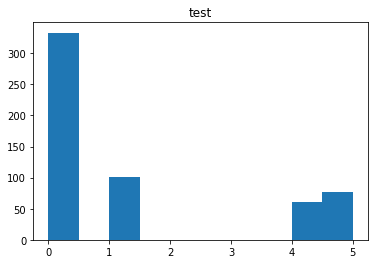

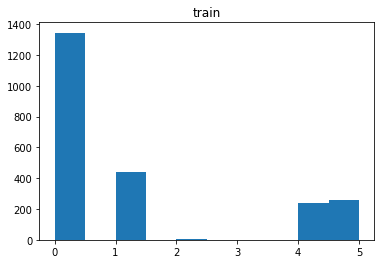

In [6]:
plt.hist(np.argmax(y_test, axis=1))
plt.title("test")
plt.figure()
plt.hist(np.argmax(y_train, axis=1))
plt.title("train")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training...
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 1.3054 - acc: 0.5784
Epoch 2/100
 - 0s - loss: 1.2295 - acc: 0.5824
Epoch 3/100
 - 0s - loss: 1.1807 - acc: 0.5942
Epoch 4/100
 - 0s - loss: 1.1525 - acc: 0.6148
Epoch 5/100
 - 0s - loss: 1.1209 - acc: 0.6166
Epoch 6/100
 - 0s - loss: 1.1045 - acc: 0.6205
Epoch 7/100
 - 0s - loss: 1.1011 - acc: 0.6271
Epoch 8/100
 - 0s - loss: 1.0886 - acc: 0.6315
Epoch 9/100
 - 0s - loss: 1.0817 - acc: 0.6218
Epoch 10/100
 - 0s - loss: 1.0773 - acc: 0.6266
Epoch 11/100
 - 0s - loss: 1.0714 - acc: 0.6284
Epoch 12/100
 - 0s - loss: 1.0688 - acc: 0.6323
Epoch 13/100
 - 0s - loss: 1.0768 - acc: 0.6280
Epoch 14/100
 - 0s - loss: 1.0706 - acc: 0.6472
Epoch 15/100
 - 0s - loss: 1.0655 - acc: 0.6363
Epoch 16/100
 - 0s - loss: 1.0591 - acc: 0

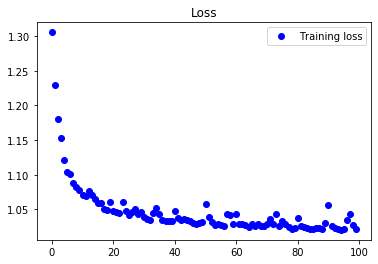

In [7]:
#build model
input_dim = x_train.shape[1]
nb_classes = y_train.shape[1]
epochs=100
batch_size=16
act='tanh'
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(68, input_dim=input_dim, activation='relu'))
model.add(Dense(136, activation=act))
#model.add(Dropout(0.15))
model.add(Dense(204, activation=act))
model.add(Dropout(0.15))
model.add(Dense(136,activation=act))
model.add(Dense(68, activation=act))
model.add(Dense(nb_classes, activation='sigmoid'))


# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Training...")
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
epochsR = range(epochs)
loss = model.history.history['loss']
plt.figure()
plt.plot(epochsR, loss, 'bo', label='Training loss')
plt.title('Loss')
plt.legend()

print("Generating test predictions...")
score = model.evaluate(x_test, y_test, verbose=1)
print(score)



571/571 [==============================] - 0s 73us/sample


Text(0, 0.5, 'true')

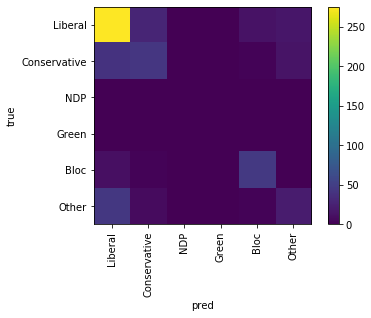

In [8]:
from sklearn.metrics import  confusion_matrix
labels=[None,'Liberal','Conservative','NDP','Green','Bloc','Other']
y_pred = model.predict_classes(x_test, verbose=1)
matrix = confusion_matrix(np.argmax(y_test, axis=1),y_pred, [0,1,2,3,4,5])
fig, ax = plt.subplots()
mat=ax.imshow(matrix)
fig.colorbar(mat)
ax.set_xticklabels(labels,rotation=90)
ax.set_yticklabels(labels)
ax.set_xlabel("pred")
ax.set_ylabel("true")

571/571 [==============================] - 0s 37us/sample


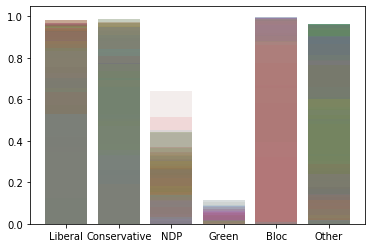

In [18]:
y_pred = model.predict(x_test, verbose=1)
y_pred.shape
for row in y_pred:
    plt.bar(['Liberal','Conservative','NDP','Green','Bloc','Other'],row, alpha=0.1)

In [10]:
from tensorflow.keras.models import model_from_json
name='julietteNet'
# serialize model to JSON
model_json = model.to_json()
with open("savedModels/"+name+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("savedModels/"+name+".h5")
print("Saved model to disk")

Saved model to disk


# extreme input

(68, 1)
1/1 [==============================] - 0s 1ms/sample
[[9.3918556e-01 6.3019240e-01 3.7819815e-03 1.0285883e-05 8.8400122e-07
  4.4197503e-01]]
2.0151461375149893
[0.46606325083091765, 0.3127278897013869, 0.0018767777993793924, 5.104286406077053e-06, 4.386784698959057e-07, 0.21932653870344013]
1.0


Text(0, 0.5, 'Fraction of Votes')

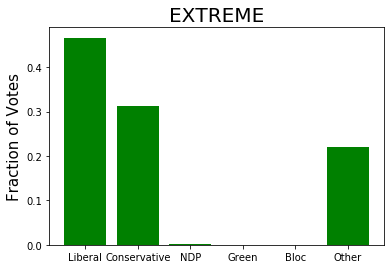

In [53]:
extreme = pickle.load(open('data/extremes.pkl','rb'))
print(extreme.shape)
extreme_pred = model.predict(extreme.T, verbose=1)
print(extreme_pred)
print(sum(extreme_pred[0]))
#normalize
extreme_pred_norm=[x/sum(extreme_pred[0]) for x in extreme_pred[0]]
print(extreme_pred_norm)
print(sum(extreme_pred_norm))
plt.bar(['Liberal','Conservative','NDP','Green','Bloc','Other'],extreme_pred_norm, color='green')
plt.title("EXTREME", fontsize=20)
plt.ylabel("Fraction of Votes", fontsize=15)

(68,)
1/1 [==============================] - 0s 381us/sample
[[7.1936184e-01 9.6249235e-01 1.7808424e-01 1.2128119e-03 2.0551073e-05
  2.2434191e-01]]
2.0855137048492907
[0.34493268493318485, 0.4615133166114414, 0.08539106645503419, 0.0005815410896557042, 9.85420196506609e-06, 0.1075715367087188]
0.9999999999999999


Text(0, 0.5, 'Fraction of Votes')

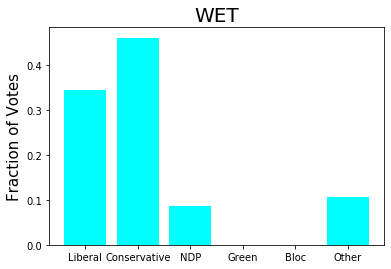

In [54]:
extreme =np.array( pickle.load(open('data/precip_extreme.pkl','rb')))
print(extreme.shape)
extreme=np.reshape(extreme, (68,1))
extreme_pred = model.predict(extreme.T, verbose=1)
print(extreme_pred)
print(sum(extreme_pred[0]))
#normalize
extreme_pred_norm=[x/sum(extreme_pred[0]) for x in extreme_pred[0]]
print(extreme_pred_norm)
print(sum(extreme_pred_norm))
plt.bar(['Liberal','Conservative','NDP','Green','Bloc','Other'],extreme_pred_norm, color='cyan')
plt.title("WET", fontsize=20)
plt.ylabel("Fraction of Votes", fontsize=15)

(68,)
1/1 [==============================] - 0s 345us/sample
[[8.3512354e-01 6.0831493e-01 5.4633981e-03 5.4367795e-04 2.6462045e-02
  2.7664959e-02]]
1.5035725503694266
[0.5554261673410824, 0.40457970002392446, 0.003633611201767658, 0.00036159076355780304, 0.017599446438662392, 0.01839948423100523]
1.0


Text(0, 0.5, 'Fraction of Votes')

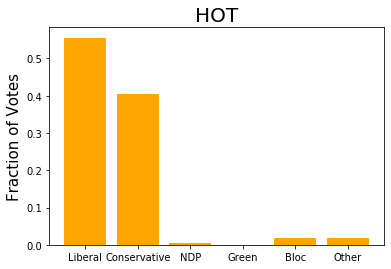

In [55]:
extreme =np.array( pickle.load(open('data/temp_extreme.pkl','rb')))
print(extreme.shape)
extreme=np.reshape(extreme, (68,1))
extreme_pred = model.predict(extreme.T, verbose=1)
print(extreme_pred)
print(sum(extreme_pred[0]))
#normalize
extreme_pred_norm=[x/sum(extreme_pred[0]) for x in extreme_pred[0]]
print(extreme_pred_norm)
print(sum(extreme_pred_norm))
plt.bar(['Liberal','Conservative','NDP','Green','Bloc','Other'],extreme_pred_norm,color='orange')
plt.title("HOT", fontsize=20)
plt.ylabel("Fraction of Votes", fontsize=15)

# input for this year

(75, 70)
75/75 [==============================] - 0s 104us/sample
1.5230008363723755
0.9999999999999999


Text(0.5, 1.0, 'Extreme temperature')

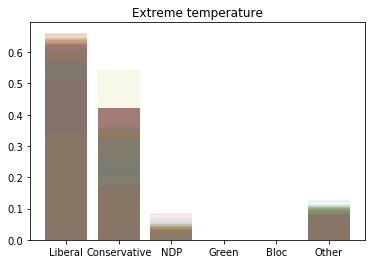

In [33]:
october =np.array( pickle.load(open('data/todays-input.pkl','rb')))
print(october.shape)
october_pred = model.predict(october[:,:-2], verbose=1)
#print(october_pred)
print(sum(october_pred[0]))
#normalize
october_pred_norm=[[x/sum(row) for x in row] for row in october_pred]
#print(october_pred_norm)
print(sum(october_pred_norm[0]))
for row in october_pred_norm:
    plt.bar(['Liberal','Conservative','NDP','Green','Bloc','Other'],row,alpha=0.1)
plt.title("Extreme temperature")

In [41]:
df= pd.DataFrame(columns=["Results",'lon','lat'])
df['Results']=october_pred_norm
print(len(october_pred_norm))
print(len(october[:,-2]))
df['lon']=october[:,-2]
df['lat']=october[:,-1]
df.to_csv("data/2019electionPrediction.csv")

75
75


In [45]:
np.argmax(october_pred_norm,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])